In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')  

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#Obviously there are null values in some columns like age,cabin,embarked

In [7]:
#next step would to handle those missing data points

In [8]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [9]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [10]:
df.drop(columns=['Cabin'], inplace=True)

#I dropped the cabin column since this had 687 missing values;the error you see in the original work is because I ran this part of code twice 

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
# The missing datasets have been handled ,We can move to the visulaization and analysis

In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
#catagorical analysis of data
df['Sex'].value_counts()
df['Pclass'].value_counts()
df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [15]:
df['Sex'].value_counts()
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [16]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [17]:
#for some strange reason ,value_counts() function could only display the values for one parameter,I DID not know that.

In [18]:
df[['Sex', 'Pclass', 'Embarked']].apply(pd.Series.value_counts)

TypeError: '<' not supported between instances of 'int' and 'str'

In [ ]:
#I have absoultely no idea why this error arrived but lets ignore this since this work was already done before in parts and I was just trying to find more efficient way to do it.

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

NameError: name 'plt' is not defined

In [20]:
# I forgot to import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

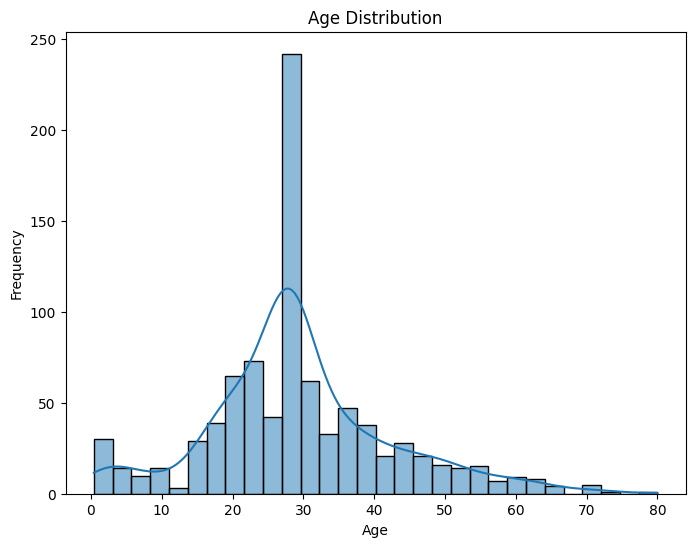

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

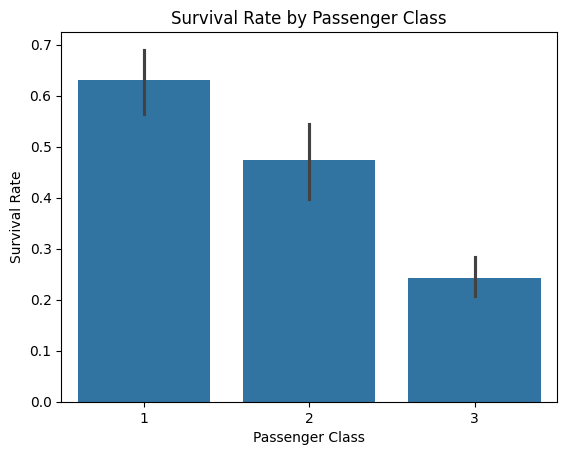

In [26]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()
# This part of the code will let me know if passenger class has any correlation with survival rate

In [27]:
# Obviously it does

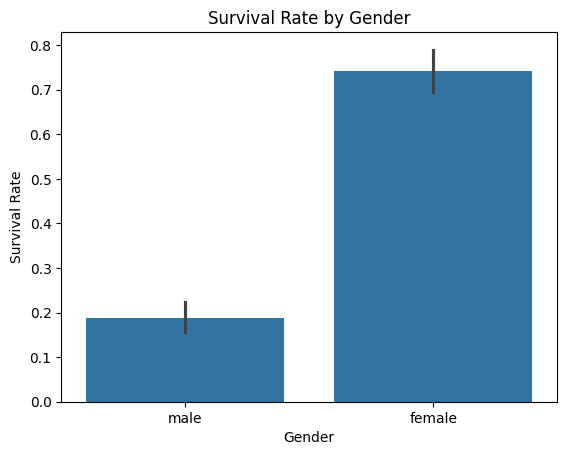

In [28]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()
#This part will let me know if survival rate had something to do with gender

In [29]:
# again,It's too obvious

In [30]:
# and sad

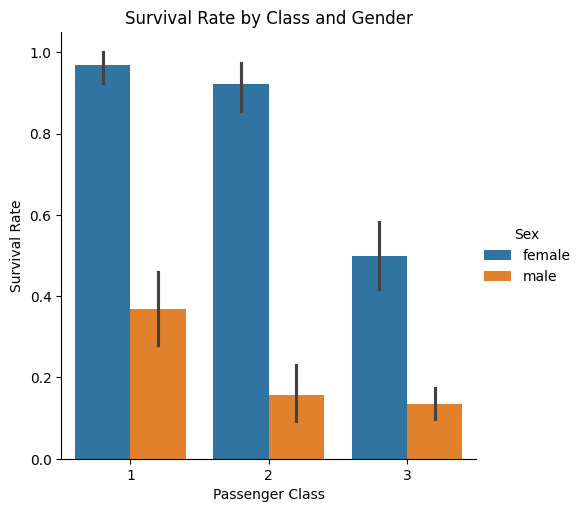

In [31]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='bar', data=df)
plt.title('Survival Rate by Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()
# let's see if this situation changed with different passenger class

In [32]:
# Unbelievable

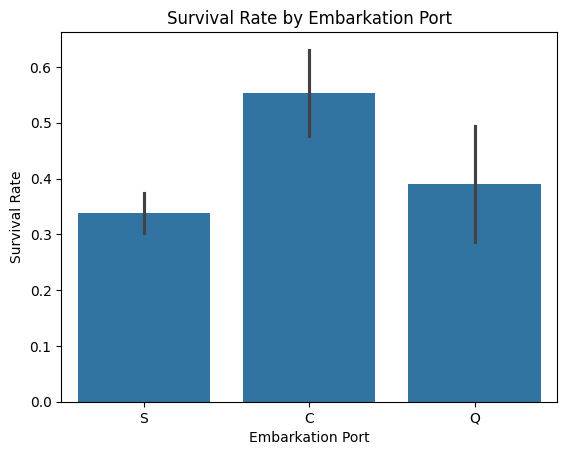

In [33]:
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Rate by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Survival Rate')
plt.show()
# This would tell where the more well endowed pasangers were from since they survived better

In [34]:
# C had the highest rate of survival;suggesting probably more passangers from first class were from there

In [35]:
# Next I would do a correlation analysis

In [36]:
correlation = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

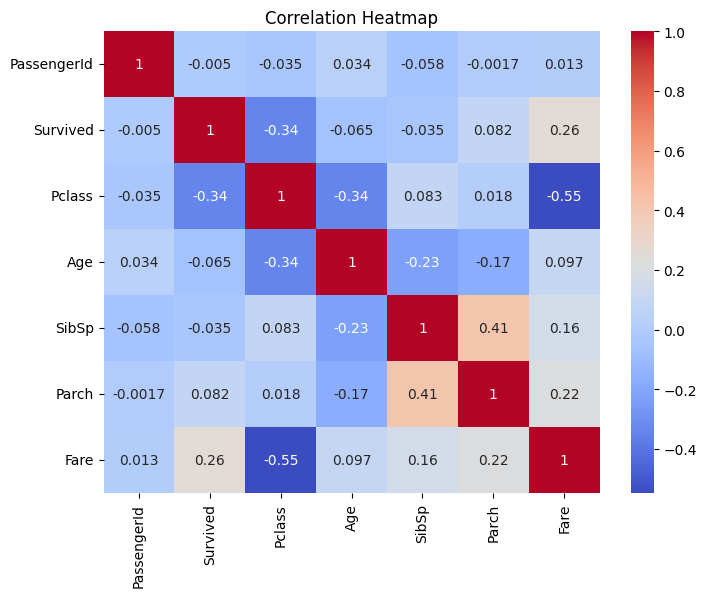

In [37]:
# There was an error bacause I forgot that there were non numeric data in the dataset;silly mistake forgive me
numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [38]:
# I don't see too high correlation but maybe I should have converted "Gender" into numeric values;maybe I would have been able to spot some

In [39]:
# high correlation values but that would be a lesson I learn from this project

In [40]:
# Infact there was some degree of correlation between fare and survival rate,passenger class and survival rate 

In [41]:
summary = '''

# My findings from this project

1.Highest survival rate as per age is for those who had age between 25 to 30.
My theory is that they had the best combination of physical fitness and authority ,so they were able to survive better than others.

2.Women survived more than men ,in fact the survival rate for women was almost double that of men.
My theory is that the men had "women and children first" mentality.

3.Those from higher passanger class survived better.
They must have had better access to survival lifeboats or in general better survival measures in place

4.Those from port C survived better 
No need to check ;most of the higher class passengers embarked from there ,maybe this was a more prosperous port or something.

'''
from IPython.display import Markdown
display(Markdown(summary))



# My findings from this project

1.Highest survival rate as per age is for those who had age between 25 to 30.
My theory is that they had the best combination of physical fitness and authority ,so they were able to survive better than others.

2.Women survived more than men ,in fact the survival rate for women was almost double that of men.
My theory is that the men had "women and children first" mentality.

3.Those from higher passanger class survived better.
They must have had better access to survival lifeboats or in general better survival measures in place

4.Those from port C survived better 
No need to check ;most of the higher class passengers embarked from there ,maybe this was a more prosperous port or something.



In [42]:
# This would be my first predictive model

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # 0 = male, 1 = female
df['Embarked'] = df['Embarked'].fillna('S')  # Fill missing values in Embarked
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])  # 0 = C, 1 = Q, 2 = S

# Define features (X) and target (y)
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']].fillna(0)  # Fill missing numeric values with 0
y = df['Survived']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data size: {X_train.shape}")
print(f"Testing data size: {X_test.shape}")


Training data size: (712, 5)
Testing data size: (179, 5)


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Creating and training the logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.80


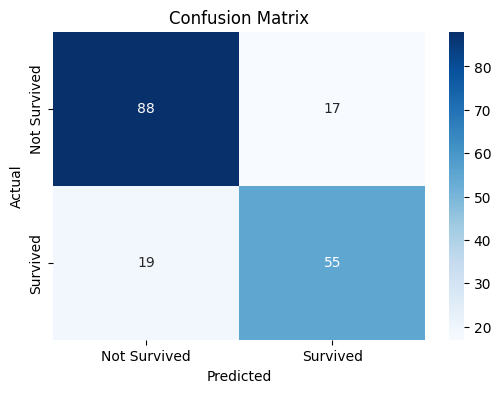

In [45]:
# Model evaluation
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Ploting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculating precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Precision: 0.76
Recall: 0.74
F1-Score: 0.75


In [47]:
# This concludes my first project ;it was fun but now I have to upload it to Git-hub 